In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import os
import matplotlib.pyplot as plt

## Step 1: Data collection

In [2]:
path = "C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata"
data_files = [path+"/"+item for item in os.listdir(path) if 'instances' not in item]

data_files

['C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitrange.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitrangefair.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitrangemaxcard.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitrangermax.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitsum.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitsumfair.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitsummaxcard.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitsumrmax.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta1unitrange.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Ye

In [3]:
df_list = []

for item in data_files:
    if 'fair' not in item and 'max' not in item: # filter for pareto only
        df_list.append(pd.read_csv(item))
    else:
        temp_df = pd.read_csv(item)
              
        temp_df = temp_df[~temp_df['algo'].isin(['ttc_matching','serial_dictatorship'])]
        
        if 'range' in item:
            if 'rangefair' in item:
                to_append = 'fair'
            elif 'rangemaxcard' in item:
                to_append = 'maxcard'
            elif 'rangermax' in item:
                to_append = 'rmax'
            
        temp_df.loc[temp_df.algo == 'modified_max_matching', 'algo'] = 'modified_max_matching '+to_append
        
        print(item, set(temp_df['algo']))
        
        df_list.append(temp_df)
    
df = pd.concat(df_list)
df.index = list(range(len(df)))
df = df.drop(columns=['Unnamed: 0', '0','id'])
df = df[~pd.isna(df['val_index'])]
df

C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitrangefair.csv {'modified_max_matching fair', 'epsilon_max_matching fair0.1', 'epsilon_max_matching fair1'}
C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitrangemaxcard.csv {'modified_max_matching maxcard', 'epsilon_max_matching max_cardinality_rank_maximal1', 'epsilon_max_matching max_cardinality_rank_maximal0.1'}
C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitrangermax.csv {'epsilon_max_matching rank_maximal1', 'epsilon_max_matching rank_maximal0.1', 'modified_max_matching rmax'}
C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitsumfair.csv {'twothirds_max_matching fair', 'epsilon_max_matching fair0.1', 'epsilon_max_matching fair1'}
C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitsummaxcard.csv {'epsilon_max_matching max_cardinality

,val_index,size,valuation,algo,distortion
500,1.0,5.0,theta0.2unitrange,epsilon_max_matching fair1,1.000000
501,1.0,5.0,theta0.2unitrange,epsilon_max_matching fair0.1,1.000000
502,1.0,5.0,theta0.2unitrange,modified_max_matching fair,2.128849
503,2.0,5.0,theta0.2unitrange,epsilon_max_matching fair1,1.000000
504,2.0,5.0,theta0.2unitrange,epsilon_max_matching fair0.1,1.000000
...,...,...,...,...,...
37995,499.0,100.0,theta5unitsum,epsilon_max_matching rank_maximal0.1,1.006841
37996,499.0,NaN,theta5unitsum,twothirds_max_matching rank_maximal,1.105340
37997,500.0,100.0,theta5unitsum,epsilon_max_matching rank_maximal1,1.080483
37998,500.0,100.0,theta5unitsum,epsilon_max_matching rank_maximal0.1,1.006996


In [4]:
df.loc[(df.val_index.isin(range(1,101))), 'size'] = 5.0
df.loc[(df.val_index.isin(range(101,201))), 'size'] = 10.0
df.loc[(df.val_index.isin(range(201,301))), 'size'] = 20.0
df.loc[(df.val_index.isin(range(301,401))), 'size'] = 50.0
df.loc[(df.val_index.isin(range(401,501))), 'size'] = 100.0
df

,val_index,size,valuation,algo,distortion
500,1.0,5.0,theta0.2unitrange,epsilon_max_matching fair1,1.000000
501,1.0,5.0,theta0.2unitrange,epsilon_max_matching fair0.1,1.000000
502,1.0,5.0,theta0.2unitrange,modified_max_matching fair,2.128849
503,2.0,5.0,theta0.2unitrange,epsilon_max_matching fair1,1.000000
504,2.0,5.0,theta0.2unitrange,epsilon_max_matching fair0.1,1.000000
...,...,...,...,...,...
37995,499.0,100.0,theta5unitsum,epsilon_max_matching rank_maximal0.1,1.006841
37996,499.0,100.0,theta5unitsum,twothirds_max_matching rank_maximal,1.105340
37997,500.0,100.0,theta5unitsum,epsilon_max_matching rank_maximal1,1.080483
37998,500.0,100.0,theta5unitsum,epsilon_max_matching rank_maximal0.1,1.006996


In [5]:
df = df[df['distortion'] > 0.99]
algorithms = set(df['algo'])
df_list = {}
for algorithm in algorithms:
    df_list[algorithm] = df[df['algo']==algorithm]

In [6]:
df_list.keys()

dict_keys(['epsilon_max_matching rank_maximal1', 'epsilon_max_matching0.1', 'epsilon_max_matching fair1', 'twothirds_max_matching rank_maximal', 'serial_dictatorship', 'modified_max_matching rmax', 'epsilon_max_matching pareto0.1', 'epsilon_max_matching max_cardinality_rank_maximal0.1', 'epsilon_max_matching rank_maximal0.1', 'twothirds_max_matching fair', 'epsilon_max_matching fair0.1', 'modified_max_matching fair', 'modified_max_matching', 'epsilon_max_matching1', 'modified_max_matching maxcard', 'epsilon_max_matching pareto1', 'epsilon_max_matching max_cardinality_rank_maximal1', 'updated_hybrid_max_matching', 'twothirds_max_matching max_cardinality_rank_maximal', 'ttc_matching'])

In [7]:
for key in df_list.keys():
    print(key, df_list[key]['distortion'].argmax())

epsilon_max_matching rank_maximal1 2666
epsilon_max_matching0.1 84
epsilon_max_matching fair1 2332
twothirds_max_matching rank_maximal 916
serial_dictatorship 84
modified_max_matching rmax 53
epsilon_max_matching pareto0.1 55
epsilon_max_matching max_cardinality_rank_maximal0.1 231
epsilon_max_matching rank_maximal0.1 2287
twothirds_max_matching fair 422
epsilon_max_matching fair0.1 2211
modified_max_matching fair 97
modified_max_matching 52
epsilon_max_matching1 84
modified_max_matching maxcard 168
epsilon_max_matching pareto1 81
epsilon_max_matching max_cardinality_rank_maximal1 235
updated_hybrid_max_matching 84
twothirds_max_matching max_cardinality_rank_maximal 875
ttc_matching 1564


## Maxima and minima analysis

In [8]:
for (key, index) in [(key, df_list[key]['distortion'].argmax()) for key in df_list.keys()]:
    print(df_list[key].iloc[index])

val_index                                    167
size                                          10
valuation                          theta5unitsum
algo          epsilon_max_matching rank_maximal1
distortion                               1.17324
Name: 36998, dtype: object
val_index                          85
size                                5
valuation             theta0.2unitsum
algo          epsilon_max_matching0.1
distortion                    3.35724
Name: 5423, dtype: object
val_index                            133
size                                  10
valuation                  theta5unitsum
algo          epsilon_max_matching fair1
distortion                       1.41918
Name: 33896, dtype: object
val_index                                     112
size                                           10
valuation                           theta5unitsum
algo          twothirds_max_matching rank_maximal
distortion                                2.32517
Name: 36835, dtype: object
val

In [10]:
for (key, index) in [(key, df_list[key]['distortion'].argmin()) for key in df_list.keys()]:
    print(df_list[key].iloc[index])

val_index                                    107
size                                          10
valuation                      theta0.2unitrange
algo          epsilon_max_matching rank_maximal1
distortion                                     1
Name: 3818, dtype: object
val_index                          76
size                                5
valuation             theta0.2unitsum
algo          epsilon_max_matching0.1
distortion                          1
Name: 5378, dtype: object
val_index                            233
size                                  20
valuation              theta0.2unitrange
algo          epsilon_max_matching fair1
distortion                             1
Name: 1196, dtype: object
val_index                                     369
size                                           50
valuation                         theta0.2unitsum
algo          twothirds_max_matching rank_maximal
distortion                               0.991983
Name: 11606, dtype: object
val_i

In [15]:
templist = []
for key in df_list.keys():
    frame = df_list[key].groupby(['size', 'valuation']).mean()
    frame['size'] = [item[0] for item in frame.index]
    frame['valuation'] = [item[1] for item in frame.index]
    frame['algo'] = [key]*len(frame)
    frame.index = list(range(len(frame)))
    frame = frame.drop(columns=['val_index'])
    templist.append(frame)
    
df = pd.concat(templist)
df.index = list(range(len(df)))
df

,distortion,size,valuation,algo
0,1.001329,5.0,theta0.2unitrange,epsilon_max_matching rank_maximal1
1,1.003436,5.0,theta0.2unitsum,epsilon_max_matching rank_maximal1
2,1.002997,5.0,theta1unitrange,epsilon_max_matching rank_maximal1
3,1.003821,5.0,theta1unitsum,epsilon_max_matching rank_maximal1
4,1.022795,5.0,theta5unitrange,epsilon_max_matching rank_maximal1
...,...,...,...,...
348,1.161191,50.0,theta5unitsum,ttc_matching
349,1.159802,100.0,theta0.2unitsum,ttc_matching
350,1.127488,100.0,theta1unitsum,ttc_matching
351,1.109326,100.0,theta5unitrange,ttc_matching


## Graphs of average


### unit-sum, $\theta=0.2$

In [16]:
curr = df[(df['valuation']=='theta0.2unitsum')]
print(set(curr['algo']))

{'epsilon_max_matching0.1', 'epsilon_max_matching fair1', 'twothirds_max_matching rank_maximal', 'serial_dictatorship', 'epsilon_max_matching max_cardinality_rank_maximal1', 'twothirds_max_matching max_cardinality_rank_maximal', 'epsilon_max_matching max_cardinality_rank_maximal0.1', 'epsilon_max_matching rank_maximal0.1', 'twothirds_max_matching fair', 'epsilon_max_matching1', 'updated_hybrid_max_matching', 'epsilon_max_matching rank_maximal1', 'ttc_matching', 'epsilon_max_matching fair0.1'}


In [25]:
curr_df = curr[curr['algo'].isin(['ttc_matching','serial_dictatorship','epsilon_max_matching1','epsilon_max_matching0.1','updated_hybrid_max_matching'])]
curr_df = curr_df.pivot(index='size', columns = 'algo', values='distortion')
curr_df

algo,epsilon_max_matching0.1,epsilon_max_matching1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5.0,1.527599,1.527599,1.527599,1.192088,1.527599
10.0,1.459353,1.459353,1.459353,1.242459,1.459353
20.0,1.363784,1.363784,1.363784,1.231026,1.363784
50.0,1.221903,1.221903,1.221903,1.168577,1.221903
100.0,1.154503,1.154503,1.154503,1.127488,1.154503


<AxesSubplot:xlabel='size'>

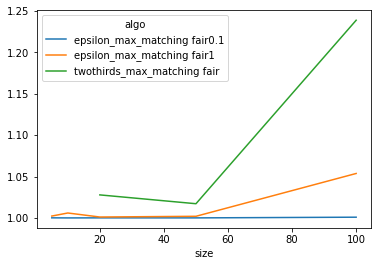

In [18]:
curr_df = curr[curr['algo'].isin(['epsilon_max_matching fair1', 'epsilon_max_matching fair0.1', 'twothirds_max_matching fair'])]
curr_df = curr_df.pivot(index='size', columns = 'algo', values='distortion')
curr_df.plot()

<AxesSubplot:xlabel='size'>

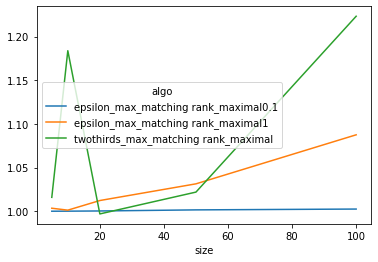

In [19]:
curr_df = curr[curr['algo'].isin(['epsilon_max_matching rank_maximal1', 'epsilon_max_matching rank_maximal0.1', 'twothirds_max_matching rank_maximal'])]
curr_df = curr_df.pivot(index='size', columns = 'algo', values='distortion')
curr_df.plot()

<AxesSubplot:xlabel='size'>

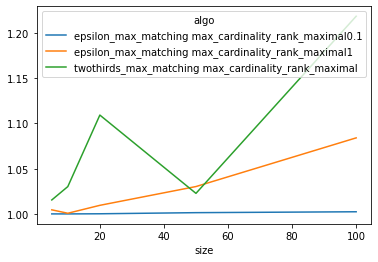

In [20]:
curr_df = curr[curr['algo'].isin(['epsilon_max_matching max_cardinality_rank_maximal1', 'epsilon_max_matching max_cardinality_rank_maximal0.1', 'twothirds_max_matching max_cardinality_rank_maximal'])]
curr_df = curr_df.pivot(index='size', columns = 'algo', values='distortion')
curr_df.plot()

<AxesSubplot:xlabel='size'>

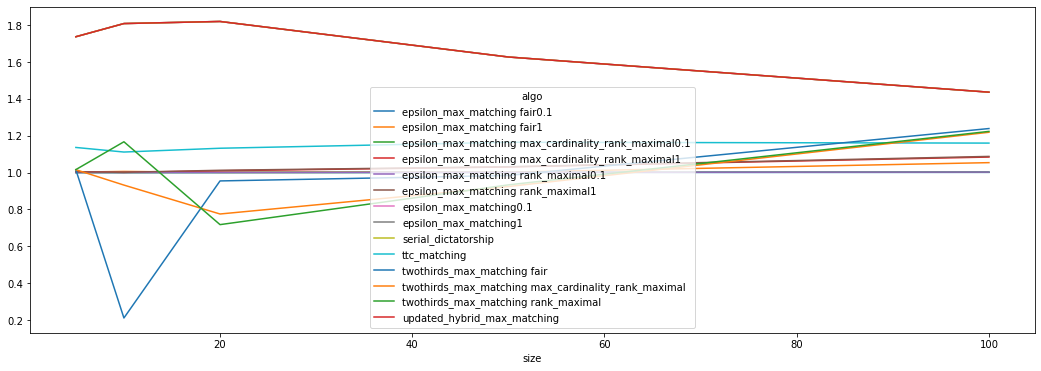

In [230]:
curr = df[(df['valuation']=='theta0.2unitsum')]
set(curr['algo'])
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(18,6))

### unit-sum, $\theta=1$


In [21]:
curr = df[(df['valuation']=='theta1unitsum')]
print(set(curr['algo']))

{'epsilon_max_matching0.1', 'epsilon_max_matching fair1', 'twothirds_max_matching rank_maximal', 'serial_dictatorship', 'epsilon_max_matching max_cardinality_rank_maximal1', 'twothirds_max_matching max_cardinality_rank_maximal', 'epsilon_max_matching max_cardinality_rank_maximal0.1', 'epsilon_max_matching rank_maximal0.1', 'twothirds_max_matching fair', 'epsilon_max_matching1', 'updated_hybrid_max_matching', 'epsilon_max_matching rank_maximal1', 'ttc_matching', 'epsilon_max_matching fair0.1'}


<AxesSubplot:xlabel='size'>

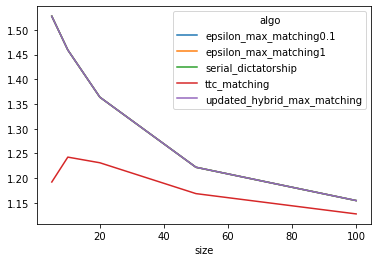

In [22]:
curr_df = curr[curr['algo'].isin(['ttc_matching','serial_dictatorship','epsilon_max_matching1','epsilon_max_matching0.1','updated_hybrid_max_matching'])]
curr_df = curr_df.pivot(index='size', columns = 'algo', values='distortion')
curr_df.plot()

<AxesSubplot:xlabel='size'>

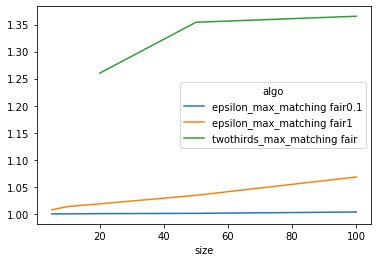

In [23]:
curr_df = curr[curr['algo'].isin(['epsilon_max_matching fair1', 'epsilon_max_matching fair0.1', 'twothirds_max_matching fair'])]
curr_df = curr_df.pivot(index='size', columns = 'algo', values='distortion')
curr_df.plot()

<AxesSubplot:xlabel='size'>

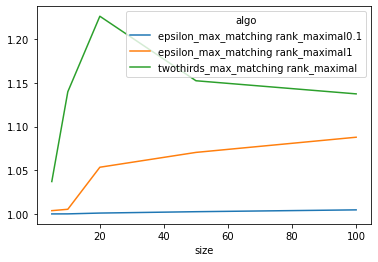

In [24]:
curr_df = curr[curr['algo'].isin(['epsilon_max_matching rank_maximal1', 'epsilon_max_matching rank_maximal0.1', 'twothirds_max_matching rank_maximal'])]
curr_df = curr_df.pivot(index='size', columns = 'algo', values='distortion')
curr_df.plot()